In [3]:
import numpy as np
import tensorflow as tf
from Train_new import *
from capsulelayers import *

model = CapsNet(input_shape=(20, 6000, 3), n_class=2,routings=3)
# net.load_weights('Number/best_model_Disthrid60_our_CCTCAPS.h5')
model.load_weights('Epoch/best_model_our.h5')
# outte = net.predict(datall,batch_size=16,verbose=1)

datall shape: (6444, 20, 6000, 3)
laballx shape: (6444,)
[0. 0. 0. ... 1. 1. 1.]
3275 3169
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Conv1: KerasTensor(type_spec=TensorSpec(shape=(None, 300, 20), dtype=tf.float32, name=None), name='layer_normalization_2/batchnorm/add_1:0', description="created by layer 'layer_normalization_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 15, 20), dtype=tf.float32, name=None), name='reshape/Reshape:0', description="created by layer 'reshape'")
Instructions for updating:
Use fn_output_signature instead
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20, 6000, 3  0           []                               
                                )]                              

In [31]:
from scipy import stats as sci
import numpy as np
import glob
import obspy
from Process import gen_scalograms
import os

# current model: best_model_quarryblast20240524.h5,
# from pylib.qbeq import qbeqrecall; qbeqrecall(1,5)
# 5 EQ/QB testing recall: 100%
# 50 EQ/QB testing recall: QB=96%,EQ=96%
#

# eids = [ii.split("/")[-1].split(".")[0] for ii in
#         glob.glob('/disk/yanglq/PhD/QBNet/Data/quarryblast_events/texnet*')]

eids = []
with open('eveQB_removed.dat') as f:
    lines = f.readlines()
    for i in lines:
        qs = i.split('\n')[0]
        eids.append(qs)
# print(eids)
eids[531:680]

['texnet2018feve',
 'texnet2017ehhm',
 'texnet2018yrcv',
 'texnet2021efid',
 'texnet2021xroq',
 'texnet2021stlr',
 'texnet2019wiou',
 'texnet2020yckh',
 'texnet2017dunt',
 'texnet2018tnol',
 'texnet2018nzip',
 'texnet2021gusq',
 'texnet2019wrzt',
 'texnet2018qbuc',
 'texnet2020seyj',
 'texnet2022uyef',
 'texnet2024etyz',
 'texnet2018nbmz',
 'texnet2023sogp',
 'texnet2019azmg',
 'texnet2021uqol',
 'texnet2017jzgf',
 'texnet2020rjcc',
 'texnet2019gpgy',
 'texnet2017onxg',
 'texnet2018jryg',
 'texnet2019lchv',
 'texnet2020nffg',
 'texnet2022ycnv',
 'texnet2020qjjv',
 'texnet2020spxa',
 'texnet2017akpm',
 'texnet2018kcqo',
 'texnet2019eoqb',
 'texnet2019jiox',
 'texnet2019svfz',
 'texnet2019ytaj',
 'texnet2018hcbc',
 'texnet2021jxgf',
 'texnet2023unkp',
 'texnet2020lwhw',
 'texnet2021sruc',
 'texnet2019eopd',
 'texnet2018xwzz',
 'texnet2020fyyg',
 'texnet2019zhls',
 'texnet2019mwfx',
 'texnet2020gvbj',
 'texnet2020ihks',
 'texnet2020ujtv',
 'texnet2019lapg',
 'texnet2019uuic',
 'texnet2020

In [32]:
import obspy
import numpy as np

datfin = []

pa = (r'Data/quarryblast_events/texnet2019aseq.qml')
pa1 = (r'Data/quarryblast_waveforms/texnet2019aseq.mseed')
cat = obspy.read_events(pa)
st = obspy.read(pa1)
st = st.resample(100)
st = st.merge(fill_value=0)
st = st.filter(type='bandpass', freqmin = 1.0, freqmax = 45, corners=2, zerophase=True)
st = st.taper(max_percentage=0.001, type='cosine', max_length=2) 

for i in cat[0].picks:
    dat = []
    if i.phase_hint=='P':
        st2 = st.copy()
        st2 = st2.select(station=i.waveform_id.station_code)
        if len(st2)==3:
            if len(st2[2].data)>=6000:
                t = obspy.UTCDateTime(i.time)
                stall = st2.trim(t-1,t+59-0.01)
                    #print(stall)
                a0 = stall[0].data
                a1 = stall[1].data
                a2 = stall[2].data
                if (len(a0)==6000) and (len(a1)==6000) and (len(a2)==6000):
                    dat.append(a0)
                    dat.append(a1)
                    dat.append(a2)

            if (len(a0)==6000):
                dat = np.array(dat)    
                datfin.append(dat.T) 

In [33]:
print(np.shape(datfin))
datfin = np.array(datfin)

(8, 6000, 3)


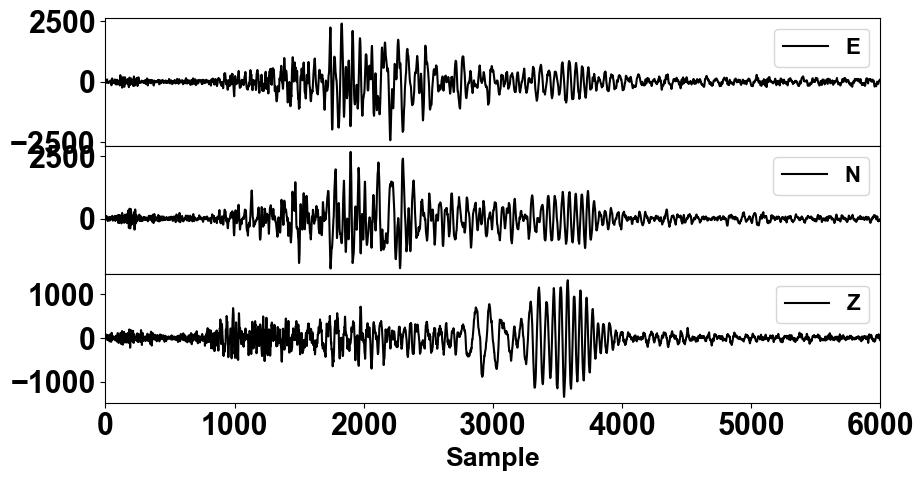

In [34]:
datfin = datfin[0,:,:]

import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 5)) 

ax = [plt.subplot(3,1,i+1) for i in range(3)]

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 16}
plt.rc('font', **font)

c = 0
kk=['E','N','Z']
for a in ax:
    im = datfin[:,c]
    a.plot(np.arange(len(im)),im,'k',label=kk[c])
    a.legend(loc='upper right')
    a.set_xlim([0,len(im)])
    if c<=1:
        a.set_xticklabels([])
        #a.set_yticklabels([])
        a.set_xticks([])
        #a.set_yticks([])
    c = c+1

a.set_xlabel('Sample',fontsize='large', fontweight='bold')
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig('Fig/QB_w.jpg',bbox_inches='tight',transparent=True, dpi =300)

In [35]:
DATA_QB = np.array(datfin)
for i in range(len(DATA_QB)):
    print(np.shape(DATA_QB[i]))
    

(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)


In [36]:
import obspy
import numpy as np
from obspy.signal.tf_misfit import cwt
from scipy import signal

data = []
label = []
nam = []
fs = 100
dt = 1/100
f_min = 1
f_max = 45



temp0 = cwt(DATA_QB[:,0], dt, 10, f_min, f_max, nf=20,  wl='morlet')
temp0 = np.clip(np.abs(temp0)[-1::-1], 0, 100)
    #temp0 = temp0[3:,:]
ma = np.max(np.abs(temp0))
if ma==0:
    ma = 1
temp0 = temp0 / ma


temp1 = cwt(DATA_QB[:,1], dt, 10, f_min, f_max, nf=20,  wl='morlet')
temp1 = np.clip(np.abs(temp1)[-1::-1], 0, 100)
    #temp1 = temp1[3:,:]
ma = np.max(np.abs(temp1))
if ma==0:
    ma = 1
temp1 = temp1 / ma

temp2 = cwt(DATA_QB[:,2], dt, 10, f_min, f_max, nf=20,  wl='morlet')
temp2 = np.clip(np.abs(temp2)[-1::-1], 0, 100)
    #temp2 = temp2[3:,:]
ma = np.max(np.abs(temp2))
if ma==0:
    ma = 1
temp2 = temp2 / ma

tmp = np.zeros((20,6000,3))
tmp[:,:,0] = np.abs(temp0[:,0:6000])
tmp[:,:,1] = np.abs(temp1[:,0:6000])
tmp[:,:,2] = np.abs(temp2[:,0:6000])


data.append(tmp)
label.append(0)

(1, 20, 6000, 3)
(20, 6000, 3)


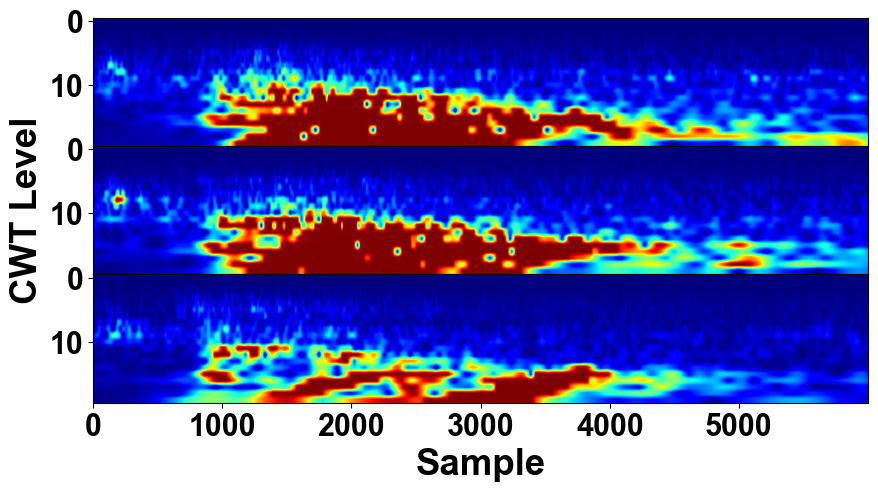

In [38]:
print(np.shape(data))
data=np.array(data)

data1 = data[0,:,:,:]
print(np.shape(data1))
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5)) 

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

ax = [plt.subplot(3,1,i+1) for i in range(3)]

daa = tmp
c = 0
for a in ax:
    im = daa[:,:,c]
    a.imshow(im,aspect='auto',cmap='jet')
    #a.set_xlim([0,len(im)])

    #a.set_yticklabels([])
    #a.set_yticks([])
    #a.set_xlim([0,len(im)])
    if c==0 or c==1:
        a.set_xticklabels([])
        a.set_xticks([])
    if c==1:
        a.set_ylabel('CWT Level',fontsize='large', fontweight='bold')
    c = c+1
    
a.set_xlabel('Sample',fontsize='large', fontweight='bold')
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig('Fig/QB_CWT.jpg',bbox_inches='tight',transparent=True, dpi =300)

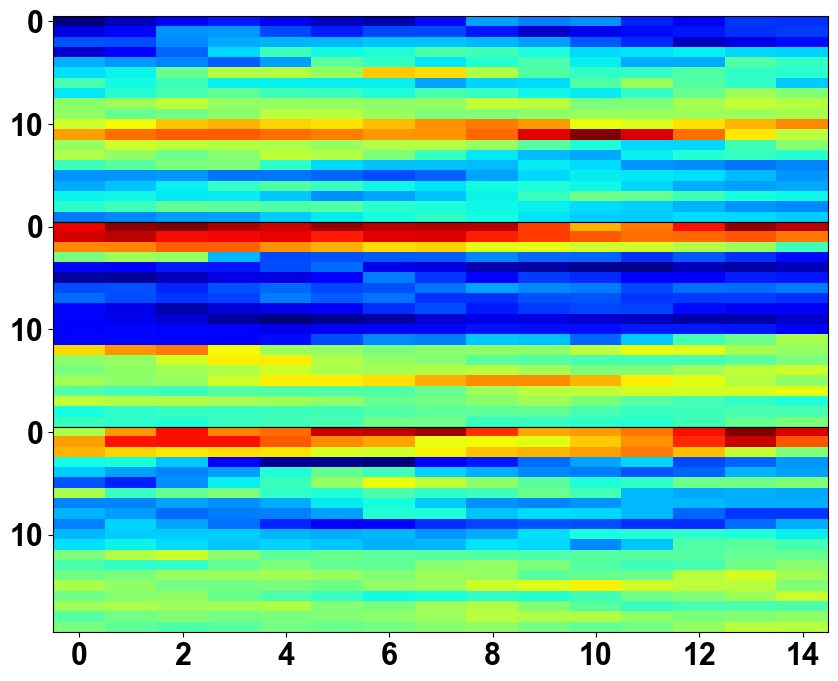

In [40]:
import tensorflow.keras.backend as K
import numpy as np

tmpallfin=tmp
#print(tmpallfin.shape)
tmpallfin = np.expand_dims(tmpallfin, axis=0)
#print(tmpallfin.shape)
tmpda = np.array(tmpallfin)
i = -7
tempmod = K.function([model.layers[0].input],
                     [model.layers[i].output])
conv1 = tempmod(tmpda)[0]


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8)) 

ax = [plt.subplot(3,1,i+1) for i in range(3)]

c = 0
for a in ax:
    im = conv1[0,:,:,c]
    a.imshow(im,aspect='auto',cmap='jet')
    if c==0 or c==1:
        a.set_xticklabels([])
        #a.set_yticklabels([])
        a.set_xticks([])
        #a.set_yticks([])
    if c==1:
        a.set_ylabel('', fontweight='normal')
    c = c+1
    
a.set_xlabel('',fontweight='normal')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('Fig/Inior_QB.jpg',bbox_inches='tight', transparent=True, dpi=300)


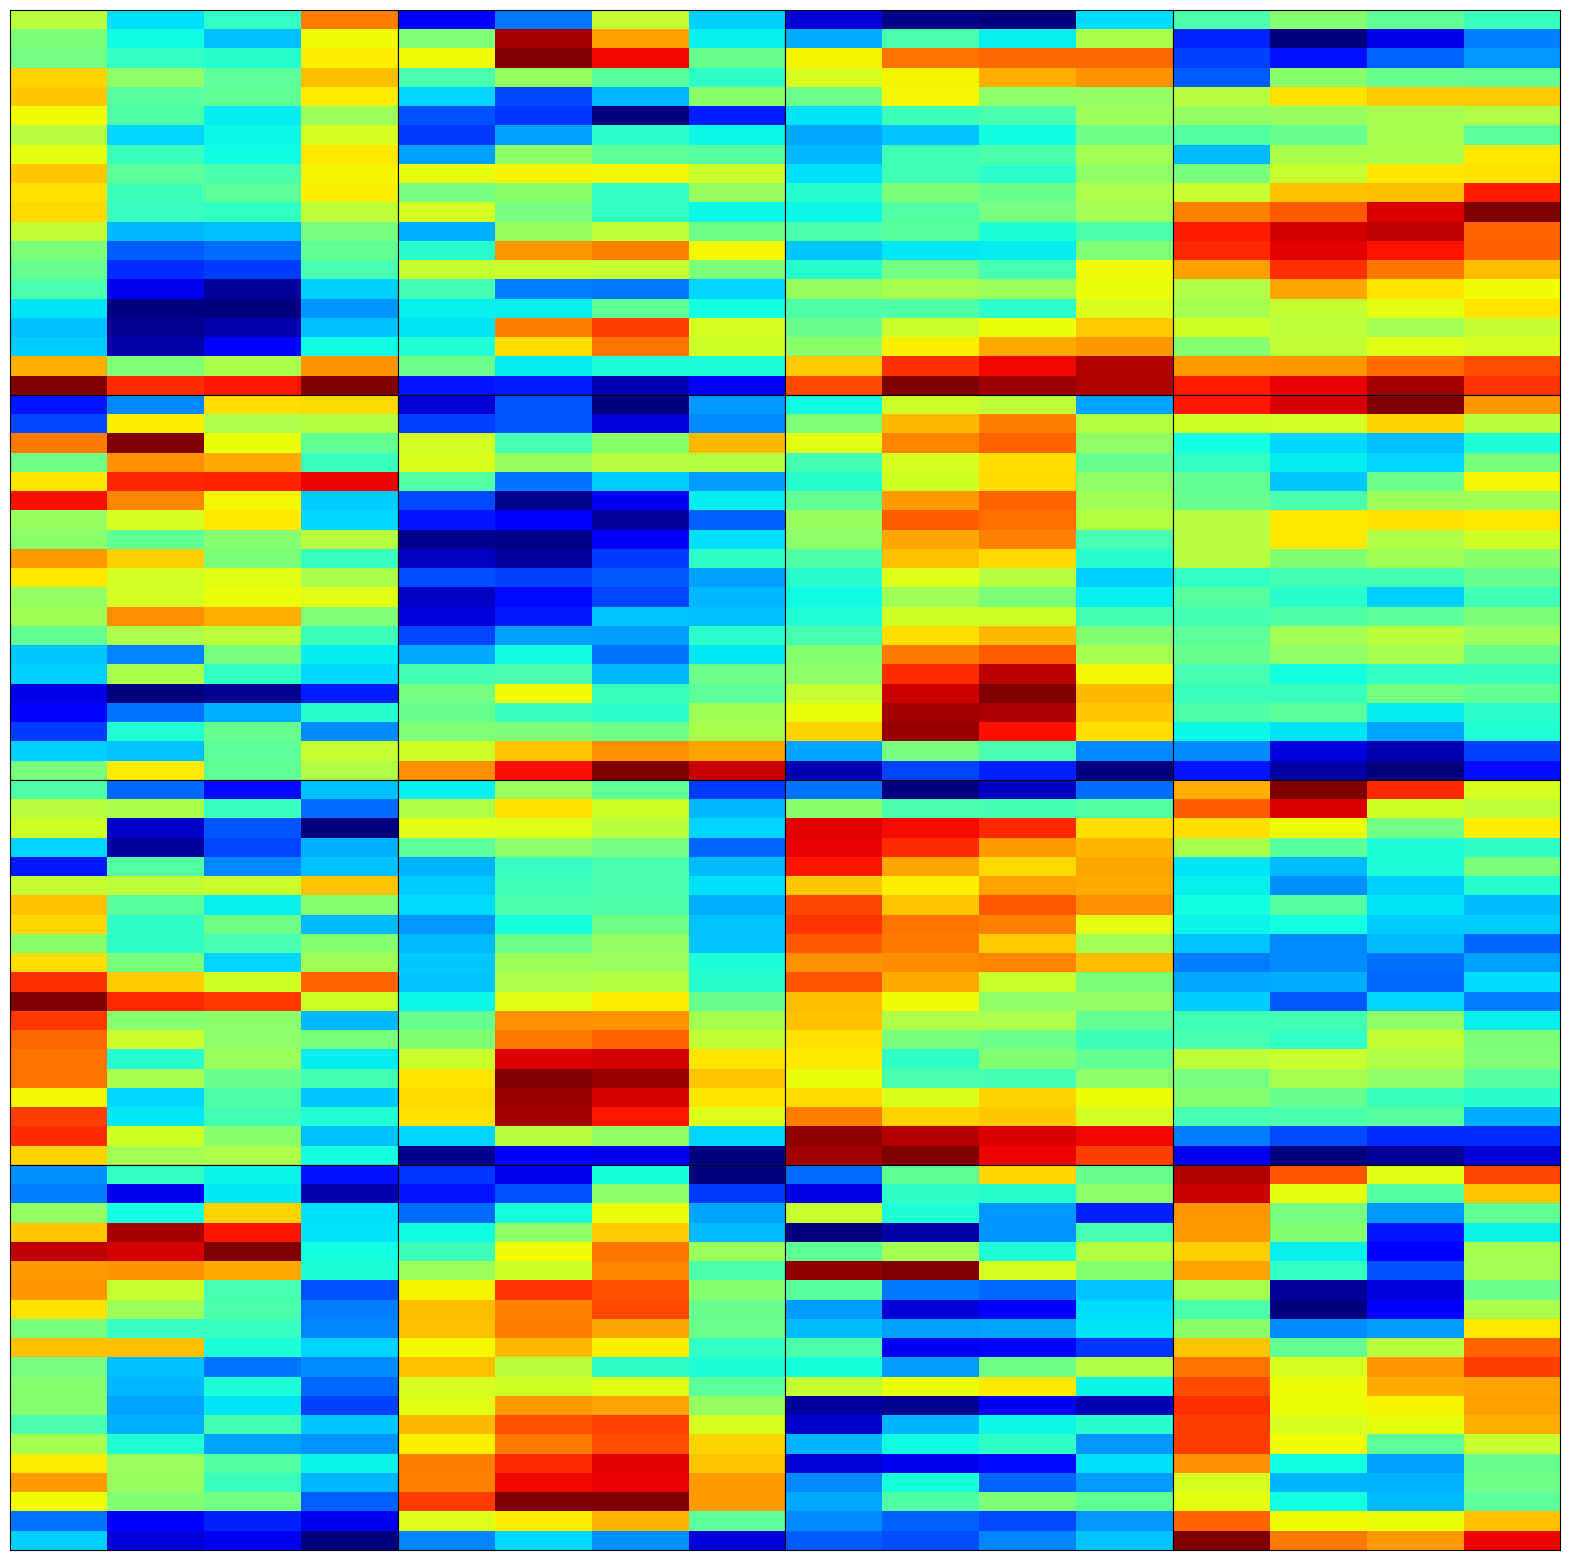

In [41]:
i = -6
tempmod = K.function([model.layers[0].input],
                     [model.layers[i].output])
out2 = tempmod(tmpda)[0]


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20)) 

ax = [plt.subplot(4,4,i+1) for i in range(16)]

c = 0
for a in ax:
    im = out2[0,:,:,c]
    a.imshow(im,aspect='auto',cmap='jet')
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_xticks([])
    a.set_yticks([])
    c = c+1
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig('Fig/Inior_QB_deep.jpg',bbox_inches='tight',transparent=True, dpi =100)
#plt.savefig('Figure/Inior_Cap_SWDdp.png',bbox_inches='tight', transparent=True, dpi=300)
